# BNP Paribas Cardif Claims Management
https://www.kaggle.com/c/bnp-paribas-cardif-claims-management

## try random forest and regression to see which is the most important features
## random forest feature importance variable

In [35]:
%matplotlib inline
import requests, zipfile, urllib.request
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sb

In [3]:
display(pd.get_option("display.max_columns"))
pd.options.display.max_columns = 133
pd.options.display.max_info_columns = 133
display(pd.get_option("display.max_columns"))
# pd.reset_option("display.max_columns") # reset option

20

133

In [4]:
# url = "https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/download/sample_submission.csv.zip"

# response = requests.get(url)

# path = "/Users/jianglongli/Desktop/GA/portfolio/data/"
# name = "sample_submission.zip"
# zip_file = path + name

# with open(zip_file, "wb") as f:
#     f.write(response.content)

# with open("data/sample_submission.zip", "rb") as f:
#     z = zipfile.ZipFile(f)
#     original_csv_filename = z.namelist()[0] # get name of first csv in zip file
#     unzipped_csv_filepath = z.extract(original_csv_filename, data_folder) # extract csv file
#     os.rename(unzipped_csv_filepath, csv_filepath) # normalize csv name


In [5]:
# # zip download question
# import requests, zipfile

# url = "https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/data/download/train.csv.zip"
# # url = 'http://www.blog.pythonlibrary.org/wp-content/uploads/2012/06/wxDbViewer.zip'
# response = requests.get(url)

# with open("code.zip", "wb") as f:
#     f.write(response.content)
# zipfile.is_zipfile('code.zip')

In [6]:
df = pd.read_csv('data/train.csv')

In [7]:
df.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.

In [8]:
df.shape

(114321, 133)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Data columns (total 133 columns):
ID        114321 non-null int64
target    114321 non-null int64
v1        64489 non-null float64
v2        64525 non-null float64
v3        110864 non-null object
v4        64525 non-null float64
v5        65697 non-null float64
v6        64489 non-null float64
v7        64489 non-null float64
v8        65702 non-null float64
v9        64470 non-null float64
v10       114237 non-null float64
v11       64485 non-null float64
v12       114235 non-null float64
v13       64489 non-null float64
v14       114317 non-null float64
v15       64485 non-null float64
v16       64426 non-null float64
v17       64525 non-null float64
v18       64489 non-null float64
v19       64478 non-null float64
v20       64481 non-null float64
v21       113710 non-null float64
v22       113821 non-null object
v23       63646 non-null float64
v24       114321 non-null object
v25       65702 non-null flo

In [10]:
df.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,1.142370e+05,6.448500e+04,1.142350e+05,6.448900e+04,1.143170e+05,6.448500e+04,6.442600e+04,6.452500e+04,6.448900e+04,6.447800e+04,64481.000000,113710.000000,6.364600e+04,65702.000000,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,1.142100e+05,6.448900e+04,6.569700e+04,6.447800e+04,114321.000000,6.448500e+04,1.142100e+05,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,65702.000000,6.452500e+04,6.448900e+04,1.142350e+05,6.364300e+04,6.448500e+04,65702.000000,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,6.452500e+04,114321.000000,65702.000000,6.452500e+04,64481.000000,6.448900e+04,64485.000000,6.442600e+04,65685.000000,114321.000000,6.448500e+04,6.452500e+04,6.448900e+04,6.442600e+04,6.447000e+04,6.569700e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.363900e+04,6.448900e+04,65658.000000,6.448900e+04,65702.000000,6.448500e+04,6.447800e+04,6.448900e+04,6.448900e+04,6.447800e+04,6.448900e+04,6.447800e+04,6.566700e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.300500e+04,6.448900e+04,6.448900e+04,65663.000000,6.452500e+04,6.569700e+04,6.569700e+04,6.448900e+04,1.142910e+05,6.442600e+04,6.448500e+04,6.569700e+04,6.447800e+04,6.364100e+04,6.448500e+04,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.883046e+00,1.544741e+01,6.881304e+00,3.798396e+00,1.209428e+01,2.080911e+00,4.923222e+00,3.832270e+00,8.410455e-01,2.223005e-01,17.773592,7.029740,1.093088e+00,1.698129,1.876031e+00,2.743454e+00,5.093328e+00,8.206416e+00,1.622151e+00,2.161633e+00,6.406236e+00,8.122387e+00,1.337560e+01,7.414708e-01,0.090928,1.237184e+00,1.046593e+01,7.182551e+00,1.292497e+01,2.216597e+00,1.079517e+01,9.142231e+00,1.630525,1.253802e+01,8.016547e+00,1.504265e+00,7.198159e+00,1.571130e+01,1.253856,1.559556e+00,4.077828e+00,7.701653e+00,1.058794e+01,1.714294e+00,1.458303e+01,1.030694,1.687327,6.343713e+00,15.847557,9.287275e+00,17.564117,9.449335e+00,12.269960,1.431767,2.433303e+00,2.405056e+00,7.307366e+00,1.333448e+01,2.209700e+00,7.287174e+00,6.208356e+00,2.173808e+00,1.607956e+00,2.822253e+00,1.220184e+00,10.180216,1.924184e+00,1.518425,9.669126e-01,5.823668e-01,5.475185e+00,3.852883e+00,6.657576e-01,6.457952e+00,7.622554e+00,7.667624e+00,1.250721e+00,1.209162e+01,6.866414e+00,2.890289e+00,5.296716e+00,2.642828e+00,1.081045,1.179136e+01,2.152620e+00,4.181284e+00,3.365314e+00,1.357445e+01,1.054805e+01,2.291218e+00,8.303857e+00,8.364651e+00,3.168970e+00,1.291218e+00,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,1.393979e+00,7.900790e-01,9.244945e-01,1.175892e+00,1.443947e+00,7.329166e-01,1.791187e+00,1.911504e+00,6.162762e-01,1.713459e-01,1.155002,1.072271,4.003695e+00,2.956854,5.511957e-01,8.343556e-01,2.677940e+00,1.285432e+00,5.635237e-01,9.848598e-01,2.025179e+00,1.339802e+00,2.355631e+00,5.413723e-01,0.583478,2.358155e+00,3.169183e+00,1.004472e+00,9.969760e-01,6.479912e-01,2.110887e+00,2.064508e+00,2.895831,2.196164e+00,9.026805e-01,1.168329e+00,2.510385e+00,7.993680e-01,2.

In [11]:
df.columns

Index(['ID', 'target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8',
       ...
       'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=133)

In [12]:
df.target.describe()

count    114321.000000
mean          0.761199
std           0.426353
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: target, dtype: float64

In [13]:
df.target.value_counts()

1    87021
0    27300
Name: target, dtype: int64

# feature engineering

In [14]:
df.dtypes.value_counts()

float64    108
object      19
int64        6
dtype: int64

In [15]:
col_obj = df.dtypes[df.dtypes == 'object'].index
col_float = df.dtypes[df.dtypes == 'float64'].index
col_int = df.dtypes[df.dtypes == 'int64'].index
col_num = df.dtypes[df.dtypes != 'object'].index

col_target = ['ID', 'target']

df_obj = df[col_target + list(col_obj)]
df_float = df[col_target + list(col_float)]
df_int = df[col_int] 
df_num = df[col_num]

In [16]:
# IDs are unique
len(df.ID.unique())

114321

In [17]:
dfmean = df.groupby('target').mean()
dfmean

,ID,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,114238.340330,1.646081,7.274653,4.024702,8.662844,2.404222,2.449455,1.552248,9.074359,1.513185,15.431097,6.791044,3.850430,11.757420,2.122566,4.953639,3.672782,0.836764,0.225571,17.715960,6.900479,1.322128,1.739897,1.847052,2.701353,5.154235,8.154097,1.654021,2.241382,6.059693,8.129107,13.543942,0.761814,0.026484,1.143700,10.641711,7.164595,12.926804,2.183818,10.622761,9.245782,1.680687,12.751557,8.020449,1.000375,7.414326,15.698931,1.274597,1.626078,4.045488,8.089941,10.476235,1.683780,14.405471,1.147179,1.741110,6.118338,15.715861,9.274642,17.650753,9.489424,12.285609,1.307875,2.484791,2.295766,7.293370,13.360768,2.262910,7.410530,6.077667,2.258217,1.673937,2.948878,1.235621,10.013713,1.843293,1.545020,0.970601,0.586452,5.326564,3.867992,0.674651,6.411988,7.587082,7.573806,1.224101,11.698573,6.656684,2.859165,5.334283,2.678133,1.099793,11.510692,2.100095,3.979347,3.471806,13.220859,10.508835,2.263580,8.216087,8.349334,3.603819,1.290933,2.843268,6.812207,3.805043,0.944664,1.672184,3.199696,1.966429,0.134212,2.028243,1.684638
1,114225.975489,1.625671,7.526222,4.184315,8.768369,2.446883,2.495146,1.478357,9.018015,1.999184,15.452727,6.909647,3.781449,12.199962,2.067343,4.913315,3.884222,0.842440,0.221235,17.792365,7.070429,1.018368,1.684468,1.885469,2.757167,5.073490,8.223457,1.611770,2.135658,6.515044,8.120198,13.320531,0.734845,0.111146,1.267632,10.410736,7.188400,12.924366,2.227273,10.851329,9.108504,1.614119,12.468466,8.015276,1.662493,7.127639,15.715327,1.247073,1.537889,4.088361,7.575185,10.624333,1.724233,14.640874,0.994151,1.669737,6.417126,15.890454,9.291390,17.535899,9.436277,12.264841,1.470634,2.416534,2.440655,7.311924,13.325920,2.192368,7.246823,6.251106,2.146315,1.586465,2.780941,1.215156,10.234673,1.950530,1.509727,0.965711,0.581036,5.523591,3.847962,0.662861,6.472923,7.634107,7.698308,1.259391,12.219642,6.934731,2.900405,5.284480,2.631329,1.074914,11.882784,2.169801,4.247339,3.330628,13.685374,10.560824,2.300219,8.332567,8.369640,3.027104,1.291311,2.703175,6.825772,3.466716,0.911684,1.672812,3.252520,2.051290,0.365337,1.892386,1.757223


In [18]:
df_obj.head()

,ID,target,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,3,1,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,4,1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,5,1,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,6,1,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,8,1,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z


In [19]:
df_num.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,-1.716131e-08,0.139412,1.720818,3.393503,0.590122,8.880867,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,12.171733,8.086643,0.899420,7.277792,16.747968,0.037096,1.299638,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,9.314079,15.231789,17.142857,11.784549,1,1.614988,2.230940,7.292418,8.571429,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,2.382692,3.930922,0.433213,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,NaN,3.056144,NaN,NaN,NaN,NaN,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,NaN,NaN,1.379210,NaN,NaN,1.129469,NaN,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,NaN,NaN,NaN,12.053353,2,NaN,NaN,NaN,NaN,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,1.825361,4.247858,NaN,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,-2.785053e-07,0.113997,2.244897,5.306122,0.836005,7.499999,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,12.711328,6.836734,0.604504,9.637627,15.102041,0.085573,0.765305,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,8.367347,11.040463,5.882353,8.460654,3,2.413618,1.963971,5.918368,11.764705,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,1.375753,1.184211,3.367348,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,-4.805344e-07,0.148843,1.308269,2.303640,8.926662,8.874521,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,12.194855,8.591954,3.329176,4.780357,16.621695,0.139721,1.178161,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,9.703065,18.568129,9.425288,13.594728,2,2.272541,2.188198,8.213602,13.448277,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.747144,1.408046,0.039051,1.042425,0.763925,5.498902,3.423944,0.832518,7.375480,6.746988,6.942002,1.334611,18.256352,8.507281,2.503055,4.872157,2.573664,0.113967,12.554274,2.230754,1.990131,2.643678,13.777666,10.574713,1.511063,4.949609,7.180

In [20]:
df_num.target.value_counts()

1    87021
0    27300
Name: target, dtype: int64

In [49]:
df_num_null = df_num[df_num.isnull().any(axis = 1)]
df_num_null.shape

(51760, 114)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1431fa9e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x143b14da0>]], dtype=object)

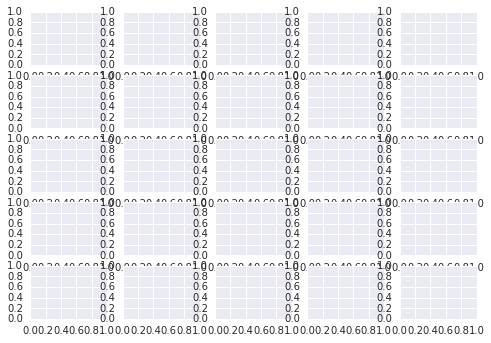

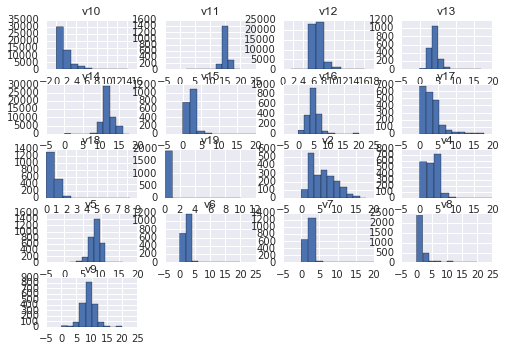

In [54]:
plt.subplots(5, 5)
df_num_null.iloc[:, 3:20].hist()

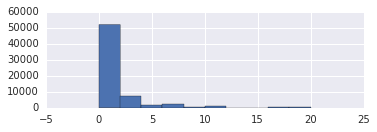

In [48]:
for i in range(20):
    plt.figure(figsize=(15, 10))
    plt.subplot(5, 5,)
    df_num.iloc[:, 8].hist()

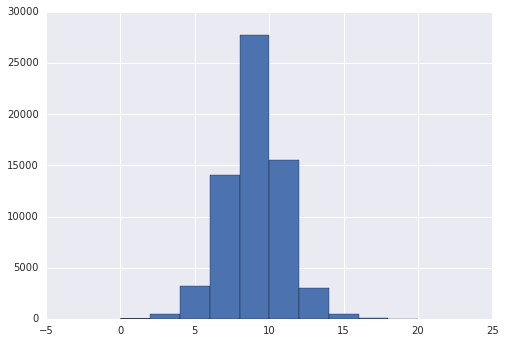

In [43]:
df_num.iloc[:,9].hist()

In [96]:
# m = pd.DataFrame(np.random.rand(5,5), columns=list('ABCDE'))
# m['F'] = [1,np.nan, np.nan, 2, np.nan]
# m[m.isnull().any(axis = 1)]

In [78]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Data columns (total 114 columns):
ID        114321 non-null int64
target    114321 non-null int64
v1        64489 non-null float64
v2        64525 non-null float64
v4        64525 non-null float64
v5        65697 non-null float64
v6        64489 non-null float64
v7        64489 non-null float64
v8        65702 non-null float64
v9        64470 non-null float64
v10       114237 non-null float64
v11       64485 non-null float64
v12       114235 non-null float64
v13       64489 non-null float64
v14       114317 non-null float64
v15       64485 non-null float64
v16       64426 non-null float64
v17       64525 non-null float64
v18       64489 non-null float64
v19       64478 non-null float64
v20       64481 non-null float64
v21       113710 non-null float64
v23       63646 non-null float64
v25       65702 non-null float64
v26       64489 non-null float64
v27       64489 non-null float64
v28       64489 non-null flo

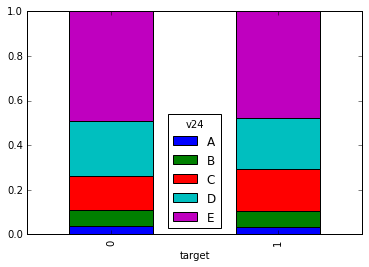

In [26]:
def crosstab(var):
    ct = pd.crosstab(df_obj.target, df[var])
    ct.div(ct.sum(1), 0).plot(kind = "bar", stacked=True)
    
crosstab('v24')

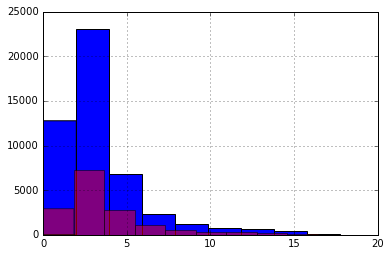

In [23]:
df[df.target == 1].v123.hist(color = 'blue')
df[df.target == 0].v123.hist(color = 'red', alpha = 0.5)

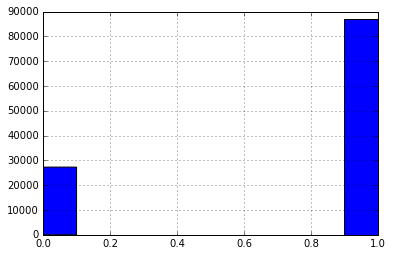

In [24]:
df.target.hist()

# feature seleciton 

### using RFECV

In [41]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [49]:
df_num.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,-1.716131e-08,0.139412,1.720818,3.393503,0.590122,8.880867,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,12.171733,8.086643,0.899420,7.277792,16.747968,0.037096,1.299638,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,9.314079,15.231789,17.142857,11.784549,1,1.614988,2.230940,7.292418,8.571429,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,2.382692,3.930922,0.433213,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,NaN,3.056144,NaN,NaN,NaN,NaN,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,NaN,NaN,1.379210,NaN,NaN,1.129469,NaN,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,NaN,NaN,NaN,12.053353,2,NaN,NaN,NaN,NaN,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,1.825361,4.247858,NaN,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,-2.785053e-07,0.113997,2.244897,5.306122,0.836005,7.499999,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,12.711328,6.836734,0.604504,9.637627,15.102041,0.085573,0.765305,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,8.367347,11.040463,5.882353,8.460654,3,2.413618,1.963971,5.918368,11.764705,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,1.375753,1.184211,3.367348,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,-4.805344e-07,0.148843,1.308269,2.303640,8.926662,8.874521,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,12.194855,8.591954,3.329176,4.780357,16.621695,0.139721,1.178161,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,9.703065,18.568129,9.425288,13.594728,2,2.272541,2.188198,8.213602,13.448277,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.747144,1.408046,0.039051,1.042425,0.763925,5.498902,3.423944,0.832518,7.375480,6.746988,6.942002,1.334611,18.256352,8.507281,2.503055,4.872157,2.573664,0.113967,12.554274,2.230754,1.990131,2.643678,13.777666,10.574713,1.511063,4.949609,7.180

In [52]:
features = df_num.drop(['target', 'ID'], axis = 1)
labels = df_num.target

In [54]:
features.shape,  df_num.shape

((114321, 112), (114321, 114))

In [ ]:
# features_train, features_test, labels_train, labels_test = train_test_split(features, labels)

In [58]:
model_logi = LogisticRegression()
rfecv = RFECV(estimator = model_logi, cv = 10, scoring='accuracy')

In [59]:
rfecv.fit(X=features, y=labels)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').